In [ ]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.cm as cm

In [ ]:
data = np.loadtxt('/content/misterious_data_3.txt')
#print(data[0])

In [ ]:
n_features = 153
n_samples = 528

x = np.empty((n_samples, n_features)) #data o features
y = np.empty((n_samples,), dtype=int) #target

with open('/content/misterious_data_3.txt', 'r') as file:
    for i, line in enumerate(file):
        values = line.strip().split('\t')
        y[i] = int(values[0])
        features = [float(value) for value in values[1:]]
        x[i] = features

# **EJERCICIO 1.1**

**Neurona Perceptrón**

In [ ]:
def perceptron(x, w):
  ws = sum(x*w)
  yt = 0
  if ws < 0:
    yt = -1
  elif ws > 0:
    yt = 1

  return yt

**Función Multi-Perceptrón**

In [ ]:
def perceptron_multi(x, w):
  yp = []
  for xi in x:
    yp.append(perceptron(xi, w))
  return np.array(yp)

**Stochastic gradient function**

In [ ]:
from numpy.core.numeric import indices
def train_perceptron_sg(x, y, x_test = None, y_test = None, n_epochs = 20, alpha = 0.001):

  n = x.shape[0]
  n_features = x.shape[1]
  w = 2*np.random.rand(n_features)-1
  epoch_acc = []

  for epoch in range(n_epochs):
    indices = np.random.permutation(n)

    for index in indices:
      yp = perceptron(x[index,:], w)
      w = w + alpha*(y[index]-yp)*x[index,:]

    if x_test is not None and y_test is not None:
      y_test_pred = perceptron_multi(x_test, w)
      acc = accuracy_score(y_test, y_test_pred)
      epoch_acc.append(acc)

  if x_test is not None and y_test is not None:
    epoch_acc = np.array(epoch_acc)
    return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

**Stochastic Gradient Implementation**

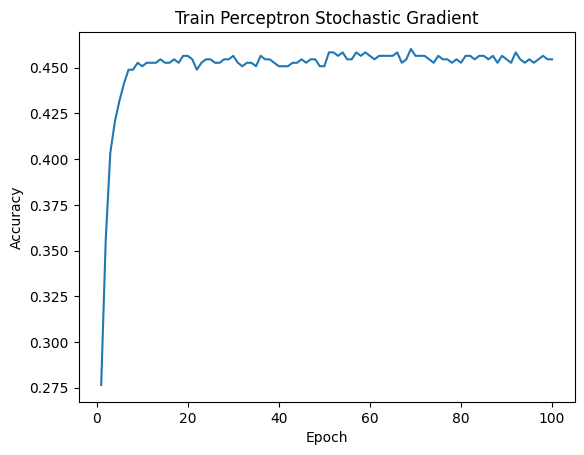

In [ ]:
n_epoch = 100
alpha = 0.001

model = train_perceptron_sg(x, y, x_test = x, y_test = y, n_epochs = n_epoch, alpha = alpha)
#print(model)

plt.plot(np.arange(1, n_epoch+1, 1), model['epoch_acc'])
plt.title("Train Perceptron Stochastic Gradient")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Cross validation for stochastic gradient evaluation**

In [ ]:
nk = 10
kf = StratifiedKFold(n_splits=nk, shuffle = True)

ACC:  0.4449927431059507


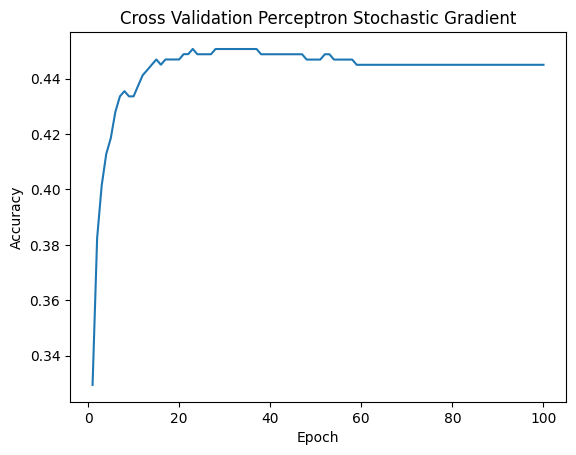

In [ ]:
n_epoch = 100
acc = 0
epoch_acc = np.zeros(n_epoch)
for train_index, test_index in kf.split(x,y):

  x_train = x[train_index, :]
  y_train = y[train_index]

  x_test = x[test_index, :]
  y_test = y[test_index]

  model = train_perceptron_sg(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epoch, alpha = alpha)
  acc += model['acc']
  epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print ("ACC: ", acc)

plt.plot(np.arange(1, n_epoch+1, 1), epoch_acc)
plt.title("Cross Validation Perceptron Stochastic Gradient")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# **EJERCICIO 1.2**

**Stochastic Gradient Batch Implementation**

In [ ]:
def train_perceptron_batch(x, y, x_test = None, y_test = None, n_epochs = 20):

  n = x.shape[0]
  n_features = x.shape[1]
  w = 2*np.random.rand(n_features)-1
  epoch_acc = []

  for epoch in range(n_epochs):
    grad = np.zeros(n_features)

    for i in range(n):
      yp = perceptron(x[i,:], w)
      grad += (y[i]-yp)*x[i,:]

    w = w + alpha*grad

    if x_test is not None and y_test is not None:
      y_test_pred = perceptron_multi(x_test, w)
      acc = accuracy_score(y_test, y_test_pred)
      epoch_acc.append(acc)

  if x_test is not None and y_test is not None:
    epoch_acc = np.array(epoch_acc)
    return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

  return {'w':w}


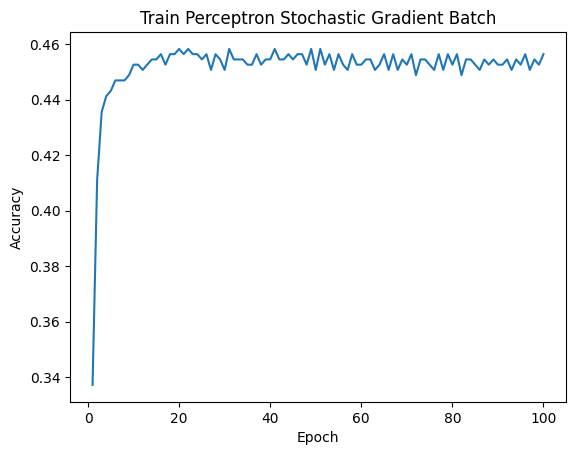

In [ ]:
n_epoch = 100
alpha = 0.001

model = train_perceptron_batch(x, y, x_test = x, y_test = y, n_epochs = n_epoch)
#print(model)

plt.plot(np.arange(1, n_epoch+1, 1), model['epoch_acc'])
plt.title("Train Perceptron Stochastic Gradient Batch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Cross validation for stochastic gradient batch evaluation**

ACC:  0.4451015965166908


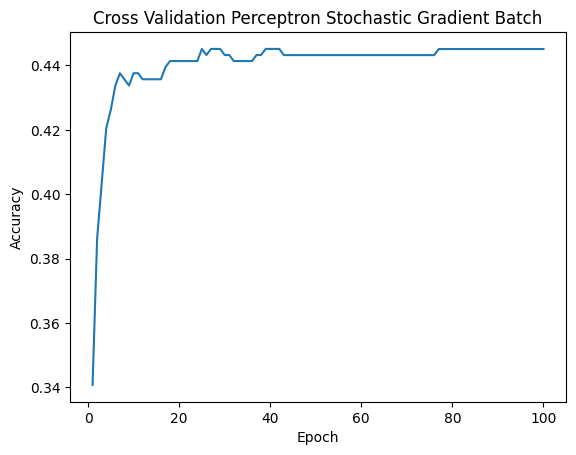

In [ ]:
n_epoch = 100
acc = 0
epoch_acc = np.zeros(n_epoch)
for train_index, test_index in kf.split(x,y):

  x_train = x[train_index, :]
  y_train = y[train_index]

  x_test = x[test_index, :]
  y_test = y[test_index]

  model = train_perceptron_batch(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epoch)
  acc += model['acc']
  epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print ("ACC: ", acc)

plt.plot(np.arange(1, n_epoch+1, 1), epoch_acc)
plt.title("Cross Validation Perceptron Stochastic Gradient Batch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Stochastic Gradient Mini Batch Implementation**

In [ ]:
def train_perceptron_mini_batch(x, y, x_test = None, y_test = None, n_epochs = 20, batch_size = 5):

  n = x.shape[0]
  n_features = x.shape[1]
  w = 2*np.random.rand(n_features)-1

  n_updates = n//batch_size + int(n%batch_size > 0)
  epoch_acc = []
  for epoch in range(n_epochs):
    indices = np.random.permutation(n)

    j = 0
    for i in range(n_updates):
      grad = np.zeros(n_features)

      counter = 0
      for b in range(batch_size):
        if j >= n:
          continue

        yp = perceptron(x[indices[j],:], w)
        grad += (y[indices[j]]-yp)*x[indices[j],:]

        counter += 1
        j += 1
      w = w + alpha*grad

    if x_test is not None and y_test is not None:
      y_test_pred = perceptron_multi(x_test, w)
      acc = accuracy_score(y_test, y_test_pred)
      epoch_acc.append(acc)

  if x_test is not None and y_test is not None:
    epoch_acc = np.array(epoch_acc)
    return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

  return {'w':w}

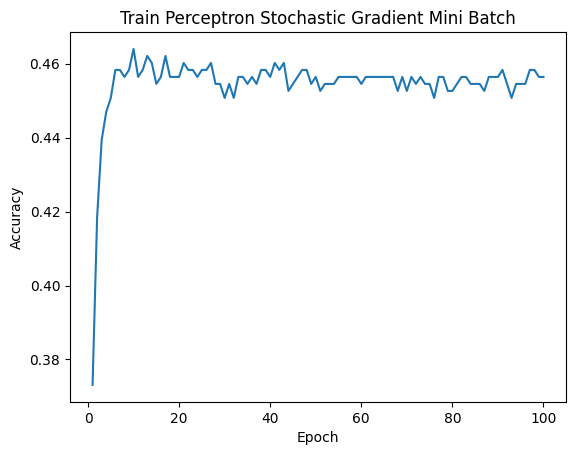

In [ ]:
n_epoch = 100
alpha = 0.001

model = train_perceptron_mini_batch(x, y, x_test = x, y_test = y, n_epochs = n_epoch)
#print(model)

plt.plot(np.arange(1, n_epoch+1, 1), model['epoch_acc'])
plt.title("Train Perceptron Stochastic Gradient Mini Batch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Cross validation for stochastic gradient mini batch evaluation**

ACC:  0.44314223512336726


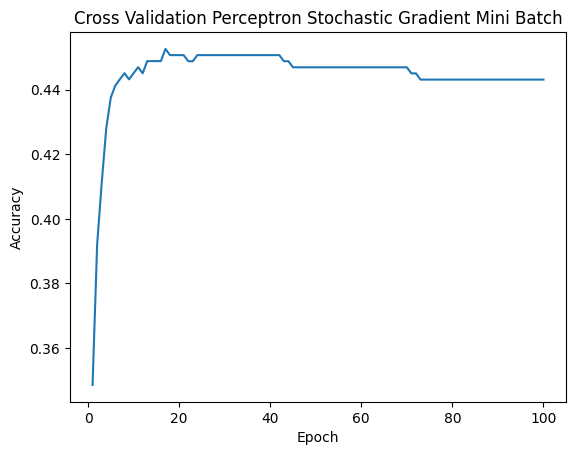

In [ ]:
n_epoch = 100
acc = 0
epoch_acc = np.zeros(n_epoch)
for train_index, test_index in kf.split(x,y):

  x_train = x[train_index, :]
  y_train = y[train_index]

  x_test = x[test_index, :]
  y_test = y[test_index]

  model = train_perceptron_mini_batch(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epoch)
  acc += model['acc']
  epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print ("ACC: ", acc)

plt.plot(np.arange(1, n_epoch+1, 1), epoch_acc)
plt.title("Cross Validation Perceptron Stochastic Gradient Mini Batch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# **EJERCICIO 1.3**

**SVM Implementation with a Perceptron**

In [ ]:
def train_perceptron_SVM(x, y, x_test = None, y_test = None, n_epochs = 20, batch_size = 5):

  n = x.shape[0]
  n_features = x.shape[1]
  w = 2*np.random.rand(n_features)-1

  n_updates = n//batch_size + int(n%batch_size > 0)
  epoch_acc = []
  for epoch in range(n_epochs):
    indices = np.random.permutation(n)

    j = 0
    for i in range(n_updates):
      grad = np.zeros(n_features)

      counter = 0
      for b in range(batch_size):
        if j >= n:
          continue

        yp = perceptron(x[indices[j],:], w)
        if y[indices[j]] * yp < 1:
          grad += y[indices[j]] * x[indices[j], :]

        counter += 1
        j += 1
      w = w + alpha*grad #############################################

    if x_test is not None and y_test is not None:
      y_test_pred = perceptron_multi(x_test, w)
      acc = accuracy_score(y_test, y_test_pred)
      epoch_acc.append(acc)

  if x_test is not None and y_test is not None:
    epoch_acc = np.array(epoch_acc)
    return {'w':w, 'acc':epoch_acc[-1], 'epoch_acc': epoch_acc}

  return {'w':w}

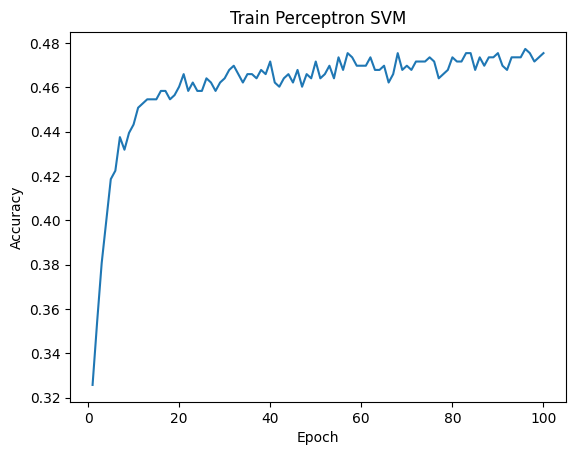

In [ ]:
n_epoch = 100
alpha = 0.001

model = train_perceptron_SVM(x, y, x_test = x, y_test = y, n_epochs = n_epoch)
#print(model)

plt.plot(np.arange(1, n_epoch+1, 1), model['epoch_acc'])
plt.title("Train Perceptron SVM")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

**Cross validation SVM Perceptron**

ACC:  0.45253991291727147


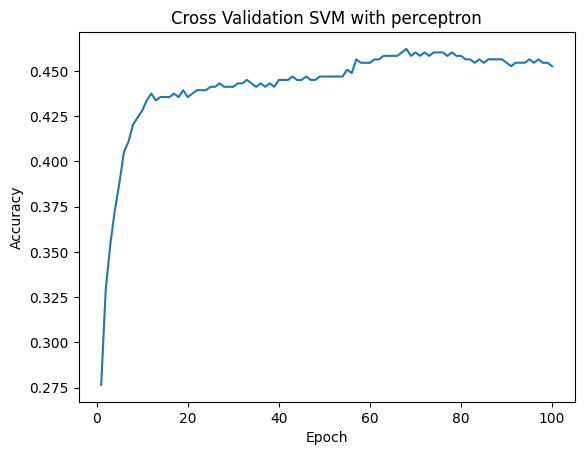

In [ ]:
n_epoch = 100
acc = 0
epoch_acc = np.zeros(n_epoch)
for train_index, test_index in kf.split(x,y):

  x_train = x[train_index, :]
  y_train = y[train_index]

  x_test = x[test_index, :]
  y_test = y[test_index]

  model = train_perceptron_SVM(x_train, y_train, x_test = x_test, y_test = y_test, n_epochs = n_epoch)
  acc += model['acc']
  epoch_acc += model['epoch_acc']

acc /= nk
epoch_acc /= nk
print ("ACC: ", acc)

plt.plot(np.arange(1, n_epoch+1, 1), epoch_acc)
plt.title("Cross Validation SVM with perceptron")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()